# 🌍 Adjacency and Probability Matrix for Andalucian Cities

In this notebook, we construct the **adjacency matrix (A)** and the **probability matrix (A’)** for our selected cities in **Andalucia**.  
Each city represents a node, and the bidirectional routes between them define the edges.

We also include **self-loops** for the eight major cities (Málaga, Sevilla, Córdoba, Granada, Almería, Jaén, Huelva, and Cádiz),  
allowing for intra-city transitions in the probability model.

- **Adjacency Matrix (A):** 1 if two cities are connected, 0 otherwise.  
- **Probability Matrix (A’):** obtained by normalizing each column of A so that the column sum equals 1.

This structure will serve as the foundation for simulating network dynamics or modeling population spread across Andalucia.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# List of cities (nodes)
cities = [
    "Málaga", "Sevilla", "Córdoba", "Granada", "Almería", "Jaén",
    "Huelva", "Cádiz", "Jerez de la Frontera", "San Fernando",
    "Marbella", "Torremolinos", "Fuengirola", "Motril", "Utrera",
    "Ronda", "Écija", "Antequera", "Algeciras", "Linares"
]

# List of bidirectional connections (edges)
connections = [
    ("Málaga", "Antequera"), ("Málaga", "Granada"), ("Málaga", "Torremolinos"),
    ("Torremolinos", "Fuengirola"), ("Fuengirola", "Marbella"),
    ("Málaga", "Ronda"), ("Antequera", "Córdoba"), ("Antequera", "Sevilla"),
    ("Ronda", "Antequera"), ("Ronda", "Marbella"), ("Marbella", "Algeciras"),
    ("San Fernando", "Cádiz"), ("San Fernando", "Algeciras"),
    ("Jerez de la Frontera", "Cádiz"), ("Jerez de la Frontera", "Sevilla"),
    ("Sevilla", "Écija"), ("Sevilla", "Huelva"), ("Sevilla", "Córdoba"),
    ("Écija", "Córdoba"), ("Córdoba", "Jaén"), ("Jaén", "Linares"),
    ("Jaén", "Granada"), ("Jaén", "Almería"), ("Granada", "Motril"),
    ("Granada", "Almería"), ("Málaga", "Motril")
]

# Add self-loops for the 8 major cities
main_cities = ["Málaga", "Sevilla", "Córdoba", "Granada", "Almería", "Jaén", "Huelva", "Cádiz"]
for city in main_cities:
    connections.append((city, city))


In [6]:
# Create adjacency matrix
n = len(cities)
adj_matrix = np.zeros((n, n), dtype=int)

# Fill the matrix (undirected → symmetric)
for a, b in connections:
    i, j = cities.index(a), cities.index(b)
    adj_matrix[i, j] = 1
    adj_matrix[j, i] = 1

# Convert to DataFrame for better visualization
adjacency_df = pd.DataFrame(adj_matrix, index=cities, columns=cities)

print("🔹 Adjacency Matrix (A):")
display(adjacency_df)


🔹 Adjacency Matrix (A):


,Málaga,Sevilla,Córdoba,Granada,Almería,Jaén,Huelva,Cádiz,Jerez de la Frontera,San Fernando,Marbella,Torremolinos,Fuengirola,Motril,Utrera,Ronda,Écija,Antequera,Algeciras,Linares
Málaga,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0
Sevilla,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0
Córdoba,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
Granada,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Almería,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Jaén,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Huelva,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Cádiz,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
Jerez de la Frontera,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
San Fernando,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [7]:
# Normalize each column so that its sum = 1
prob_matrix = np.zeros_like(adj_matrix, dtype=float)

for j in range(n):
    col_sum = np.sum(adj_matrix[:, j])
    if col_sum != 0:
        prob_matrix[:, j] = adj_matrix[:, j] / col_sum

# Convert to DataFrame for better visualization
probability_df = pd.DataFrame(prob_matrix, index=cities, columns=cities)

print("🔹 Probability Matrix (A’ normalized):")
display(probability_df)


🔹 Probability Matrix (A’ normalized):


,Málaga,Sevilla,Córdoba,Granada,Almería,Jaén,Huelva,Cádiz,Jerez de la Frontera,San Fernando,Marbella,Torremolinos,Fuengirola,Motril,Utrera,Ronda,Écija,Antequera,Algeciras,Linares
Málaga,0.166667,0.000000,0.0,0.2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.5,0.0,0.5,0.0,0.333333,0.0,0.25,0.0,0.0
Sevilla,0.000000,0.166667,0.2,0.0,0.000000,0.0,0.5,0.000000,0.5,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.5,0.25,0.0,0.0
Córdoba,0.000000,0.166667,0.2,0.0,0.000000,0.2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.5,0.25,0.0,0.0
Granada,0.166667,0.000000,0.0,0.2,0.333333,0.2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.5,0.0,0.000000,0.0,0.00,0.0,0.0
Almería,0.000000,0.000000,0.0,0.2,0.333333,0.2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0
Jaén,0.000000,0.000000,0.2,0.2,0.333333,0.2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,1.0
Huelva,0.000000,0.166667,0.0,0.0,0.000000,0.0,0.5,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0
Cádiz,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.333333,0.5,0.5,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0
Jerez de la Frontera,0.000000,0.166667,0.0,0.0,0.000000,0.0,0.0,0.333333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0
San Fernando,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.333333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.5,0.0


In [8]:
print(f"✅ Total cities (nodes): {len(cities)}")
print(f"✅ Total connections (edges, including loops): {len(connections)}")


✅ Total cities (nodes): 20
✅ Total connections (edges, including loops): 34


## Step 2 - Predicting the Spread of the Group over 20 Years

In [12]:
# Create vector v: all 100 friends start in Málaga (index 0)
v = np.zeros(len(prob_matrix))
v[0] = 100

# Display the vector using the city names from the probability DataFrame
pd.DataFrame(v, index=probability_df.columns, columns=['Population'])


,Population
Málaga,100.0
Sevilla,0.0
Córdoba,0.0
Granada,0.0
Almería,0.0
Jaén,0.0
Huelva,0.0
Cádiz,0.0
Jerez de la Frontera,0.0
San Fernando,0.0


### Step 2B: Estimating the number of moves in 20 years

We assume that people move to a different city approximately once every **3 years**, either for work, studies, or personal reasons.  
This results in around **x = 6 to 7 moves** on average in 20 years.

For simplicity, we will use **x = 7** as our estimate.

In [14]:
# Step 2C: Compute A^x efficiently using matrix exponentiation
x = 7
A_power = np.linalg.matrix_power(probability_df.values, x)

# Display resulting transition probabilities after 7 moves
pd.DataFrame(A_power, index=probability_df.columns, columns=probability_df.columns)


,Málaga,Sevilla,Córdoba,Granada,Almería,Jaén,Huelva,Cádiz,Jerez de la Frontera,San Fernando,Marbella,Torremolinos,Fuengirola,Motril,Utrera,Ronda,Écija,Antequera,Algeciras,Linares
Málaga,0.134964,0.065020,0.081422,0.129480,0.116093,0.104194,0.054440,0.035787,0.044789,0.057823,0.131791,0.162924,0.124499,0.143876,0.0,0.123342,0.070434,0.107633,0.077940,0.099593
Sevilla,0.065020,0.169845,0.142763,0.055711,0.056825,0.078992,0.209632,0.118352,0.163237,0.104939,0.067894,0.053814,0.035216,0.055018,0.0,0.071411,0.173632,0.122764,0.052356,0.073285
Córdoba,0.067852,0.118969,0.116140,0.077076,0.085275,0.097904,0.134176,0.059221,0.092791,0.044256,0.046307,0.052128,0.034265,0.070288,0.0,0.063635,0.128195,0.097725,0.030319,0.096425
Granada,0.107900,0.046425,0.077076,0.145729,0.158352,0.141877,0.031899,0.011080,0.023150,0.014625,0.053973,0.087135,0.069455,0.134122,0.0,0.078148,0.057441,0.075575,0.030120,0.147789
Almería,0.058047,0.028412,0.051165,0.095011,0.111509,0.101512,0.019199,0.004771,0.013587,0.003829,0.019515,0.038890,0.024449,0.079879,0.0,0.036427,0.037653,0.041512,0.007857,0.109406
Jaén,0.086828,0.065827,0.097904,0.141877,0.169187,0.157539,0.055131,0.017945,0.037164,0.010563,0.028056,0.054286,0.035811,0.115391,0.0,0.059596,0.078748,0.072802,0.015144,0.177430
Huelva,0.018147,0.069877,0.053671,0.012760,0.012799,0.022052,0.092018,0.040902,0.056367,0.023260,0.011530,0.010216,0.010007,0.012567,0.0,0.023897,0.065671,0.041874,0.017338,0.019676
Cádiz,0.017893,0.059176,0.035532,0.006648,0.004771,0.010767,0.061353,0.164580,0.139674,0.193690,0.093772,0.036873,0.027122,0.008775,0.0,0.027894,0.050477,0.040315,0.097325,0.007954
Jerez de la Frontera,0.014930,0.054412,0.037117,0.009260,0.009058,0.014865,0.056367,0.093116,0.068506,0.062134,0.020202,0.009618,0.027590,0.009393,0.0,0.029138,0.043327,0.028468,0.070990,0.013473
San Fernando,0.019274,0.034980,0.017702,0.005850,0.002552,0.004225,0.023260,0.129127,0.062134,0.070645,0.018844,0.010815,0.084973,0.009298,0.0,0.053586,0.017730,0.014903,0.151588,0.002759


In [16]:
# Step 2D: Compute final distribution after x moves
v_final = A_power @ v

# Display results as a DataFrame
pd.DataFrame(v_final, index=probability_df.columns, columns=['Final Population after 20 years']).round(2)


,Final Population after 20 years
Málaga,13.50
Sevilla,6.50
Córdoba,6.79
Granada,10.79
Almería,5.80
Jaén,8.68
Huelva,1.81
Cádiz,1.79
Jerez de la Frontera,1.49
San Fernando,1.93



## Step 3 - Predict the Spread from Another Starting City

In [17]:
# Step 5A: Create a new initial vector v_Sevilla
# All 100 friends now start in Sevilla (index 1)
v_sevilla = np.zeros(len(prob_matrix))
v_sevilla[1] = 100  # Sevilla

# Display the new initial population vector
pd.DataFrame(v_sevilla, index=probability_df.columns, columns=['Population'])


,Population
Málaga,0.0
Sevilla,100.0
Córdoba,0.0
Granada,0.0
Almería,0.0
Jaén,0.0
Huelva,0.0
Cádiz,0.0
Jerez de la Frontera,0.0
San Fernando,0.0


In [18]:
# Step 5B: Use the same number of moves (x = 7)
x = 7

# Compute matrix exponentiation of the probability matrix
A_power_7 = np.linalg.matrix_power(probability_df.values, x)

# Display the resulting transition probabilities after 7 moves
pd.DataFrame(A_power_7, index=probability_df.columns, columns=probability_df.columns)


,Málaga,Sevilla,Córdoba,Granada,Almería,Jaén,Huelva,Cádiz,Jerez de la Frontera,San Fernando,Marbella,Torremolinos,Fuengirola,Motril,Utrera,Ronda,Écija,Antequera,Algeciras,Linares
Málaga,0.134964,0.065020,0.081422,0.129480,0.116093,0.104194,0.054440,0.035787,0.044789,0.057823,0.131791,0.162924,0.124499,0.143876,0.0,0.123342,0.070434,0.107633,0.077940,0.099593
Sevilla,0.065020,0.169845,0.142763,0.055711,0.056825,0.078992,0.209632,0.118352,0.163237,0.104939,0.067894,0.053814,0.035216,0.055018,0.0,0.071411,0.173632,0.122764,0.052356,0.073285
Córdoba,0.067852,0.118969,0.116140,0.077076,0.085275,0.097904,0.134176,0.059221,0.092791,0.044256,0.046307,0.052128,0.034265,0.070288,0.0,0.063635,0.128195,0.097725,0.030319,0.096425
Granada,0.107900,0.046425,0.077076,0.145729,0.158352,0.141877,0.031899,0.011080,0.023150,0.014625,0.053973,0.087135,0.069455,0.134122,0.0,0.078148,0.057441,0.075575,0.030120,0.147789
Almería,0.058047,0.028412,0.051165,0.095011,0.111509,0.101512,0.019199,0.004771,0.013587,0.003829,0.019515,0.038890,0.024449,0.079879,0.0,0.036427,0.037653,0.041512,0.007857,0.109406
Jaén,0.086828,0.065827,0.097904,0.141877,0.169187,0.157539,0.055131,0.017945,0.037164,0.010563,0.028056,0.054286,0.035811,0.115391,0.0,0.059596,0.078748,0.072802,0.015144,0.177430
Huelva,0.018147,0.069877,0.053671,0.012760,0.012799,0.022052,0.092018,0.040902,0.056367,0.023260,0.011530,0.010216,0.010007,0.012567,0.0,0.023897,0.065671,0.041874,0.017338,0.019676
Cádiz,0.017893,0.059176,0.035532,0.006648,0.004771,0.010767,0.061353,0.164580,0.139674,0.193690,0.093772,0.036873,0.027122,0.008775,0.0,0.027894,0.050477,0.040315,0.097325,0.007954
Jerez de la Frontera,0.014930,0.054412,0.037117,0.009260,0.009058,0.014865,0.056367,0.093116,0.068506,0.062134,0.020202,0.009618,0.027590,0.009393,0.0,0.029138,0.043327,0.028468,0.070990,0.013473
San Fernando,0.019274,0.034980,0.017702,0.005850,0.002552,0.004225,0.023260,0.129127,0.062134,0.070645,0.018844,0.010815,0.084973,0.009298,0.0,0.053586,0.017730,0.014903,0.151588,0.002759


In [19]:
# Step 5C: Compute the final distribution after 7 moves (20 years)
v_final_sevilla = A_power_7 @ v_sevilla

# Display the final population distribution starting from Sevilla
pd.DataFrame(v_final_sevilla, index=probability_df.columns, columns=['Final Population after 20 years']).round(2)


,Final Population after 20 years
Málaga,6.50
Sevilla,16.98
Córdoba,11.90
Granada,4.64
Almería,2.84
Jaén,6.58
Huelva,6.99
Cádiz,5.92
Jerez de la Frontera,5.44
San Fernando,3.50


## Step 4 - Predict the growth of each city after 8 generations

In [21]:
# Step 7A: Create universal vector u = (1,1,1,...,1)
u = np.ones(len(prob_matrix))

# Display the initial universal vector
pd.DataFrame(u, index=cities, columns=['Initial Universal Vector'])


,Initial Universal Vector
Málaga,1.0
Sevilla,1.0
Córdoba,1.0
Granada,1.0
Almería,1.0
Jaén,1.0
Huelva,1.0
Cádiz,1.0
Jerez de la Frontera,1.0
San Fernando,1.0


In [27]:
# Step 7B: Compute A^8 efficiently
A8 = np.linalg.matrix_power(prob_matrix, 8)

# Compute u after 8 generations
u_8 = A8 @ u

# Display result as DataFrame
pd.DataFrame(u_8, index=cities, columns=['Universal Vector after 8 generations']).round(2)


,Universal Vector after 8 generations
Málaga,1.87
Sevilla,1.87
Córdoba,1.52
Granada,1.50
Almería,0.89
Jaén,1.48
Huelva,0.62
Cádiz,1.06
Jerez de la Frontera,0.67
San Fernando,0.72


In [30]:
# Step 7C: Compute A^32 efficiently
A32 = np.linalg.matrix_power(prob_matrix, 32)

# Compute u after 32 generations
u_32 = A32 @ u

# Display result as DataFrame
pd.DataFrame(u_32, index=cities, columns=['Universal Vector after 32 generations']).round(2)


,Universal Vector after 32 generations
Málaga,1.90
Sevilla,1.90
Córdoba,1.58
Granada,1.58
Almería,0.95
Jaén,1.58
Huelva,0.63
Cádiz,0.96
Jerez de la Frontera,0.64
San Fernando,0.64


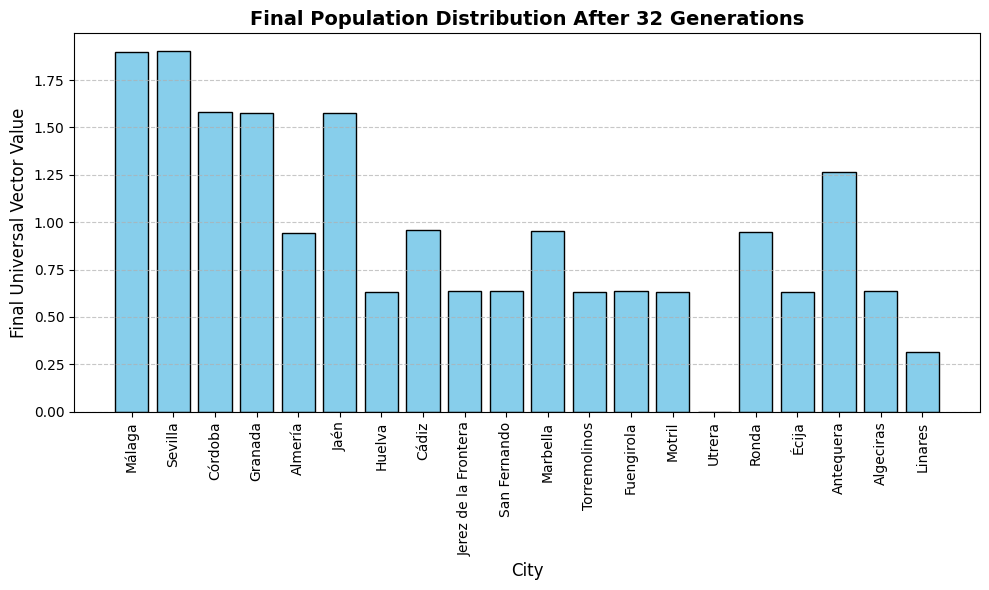

In [32]:
# Step 8: Plot bar chart for the final universal vector (after 32 generations)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(cities, u_32, color='skyblue', edgecolor='black')

# Customize labels and title
plt.xticks(rotation=90)
plt.xlabel('City', fontsize=12)
plt.ylabel('Final Universal Vector Value', fontsize=12)
plt.title('Final Population Distribution After 32 Generations', fontsize=14, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
